In [ ]:
import tensorflow as tf
import os

In [ ]:
print(tf.__version__)

In [ ]:
print(tf.__path__)

In [ ]:
!dir

# Jupyter notebook

两种模式：
* 命令模式
   - r (raw) 原始文本
   - y (code) 代码 
   - m (mark down ) 格式化文本
   - a (above) 在当前cell的上方创建并插入一个cell
   - b (below) 下方
   - 1~6 不同级别的标题
* 编辑模式
    - Ctrl + /
    - Ctrl + Enter
    - Shift Enter|

In [5]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# mnist数据集

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, optimizers, layers

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

### 读入mnist数据集

In [8]:
mnist = datasets.mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
type(train_images)

numpy.ndarray

In [11]:
type(train_labels)

numpy.ndarray

In [12]:
N_TRAINL, IMG_HEIGHT, IMG_WIDTH = train_images.shape

3


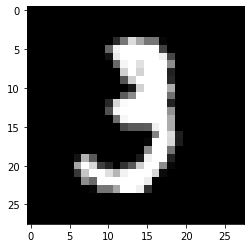

In [13]:
PIC = 10
plt.imshow(train_images[PIC], cmap = 'gray')
print(train_labels[PIC])

In [14]:
test_images.shape
# 784 = 28*28

(10000, 28, 28)

In [15]:
train_images = train_images/255.
test_images = test_images/255.
train_labels = tf.cast(train_labels, tf.float64)
test_labels = tf.cast(test_labels, tf.float64)

In [16]:
train_labels.shape

TensorShape([60000])

In [17]:
N_DATA = 20000
N_BATCH = 16
# 按batch，构建训练数据集
def mnist_dataset(x, y):
    ds = tf.data.Dataset.from_tensor_slices((x,y)).take(N_DATA).shuffle(N_DATA).batch(N_BATCH)
    return ds

In [18]:
ds = mnist_dataset(train_images, train_labels)

### 构建神经网络

In [19]:
# 输入图片 --》 layer （加法操作+非线性操作）-》 layer （加法操作+非线性操作） ——》  。。。——> logits[0.7, 0.01, 0.08,....], SIGMA=1

In [20]:
# 构建神经元网络的拓扑结构

NEURONS_L1 = 128
NEURONS_L2 = 32
NEURONS_L3 = 10

# relu(x) = max(0, x)

model = keras.Sequential([
    layers.Reshape(target_shape = (IMG_HEIGHT * IMG_WIDTH, ), input_shape = (28,28)),
    layers.Dense(NEURONS_L1, activation = 'relu'),
    layers.Dense(NEURONS_L2, activation = 'relu'),
    layers.Dense(NEURONS_L3, activation = 'softmax')
])

### 选择损失函数loss

In [21]:
# 归一化的损失函数|
def compute_loss(logits, labels):
    assert logits.shape == (N_BATCH, NEURONS_L3)
    assert labels.shape == (N_BATCH,)
    return tf.reduce_mean(tf.losses.sparse_categorical_crossentropy(labels, logits))

### 计算评估用的精度acc

In [41]:
# 评估模型的好坏（在训练集、验证集和测试集上的表现）
# 精度（人类定义）


# logits.shape == (N_BATCH, NEURONS_L3)
# labels.shape == (N_BATCH, )
def compute_accuracy(logits, labels):
    assert logits.shape == (N_BATCH, NEURONS_L3)
    assert labels.shape == (N_BATCH,)
    predictions = tf.argmax(logits, axis = 1)   # prediciton.shape == (N_BATCH, )
    assert predictions.shape == labels.shape
    return tf.reduce_mean(tf.cast(tf.equal(predictions, tf.cast(labels, tf.int64)), tf.int64))

### 选择最优化方法

In [42]:
# 数值最优化方法
# 梯度下降、牛顿法

# 调整权值weights
optimizer = optimizers.Adam(learning_rate = 0.001)

### 训练和评估

In [43]:
# 1.0 session

# 一个step/batch
def train_one_step(model, optimizer, x, y):
    # 获得梯度
    with tf.GradientTape( ) as tape:
        logits = model(x)
        loss = compute_loss(logits, y)
        
    # 计算梯度  
    grads = tape.gradient(loss, model.trainable_variables)
    
    # 更新参数 w <- w - grads * learning_rate
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    accuracy = compute_accuracy(logits, y)
    
    return loss, accuracy

# 一个epoch （整个训练集遍历了一遍）
def train(epoch, model, optimizer, train_images, train_labels):
    
    # 获取批数据
    train_ds = mnist_dataset(train_images, train_labels)

    loss = 0.
    accuracy = 0.
    for step, (x, y) in enumerate(train_ds):
        loss, accuracy = train_one_step(model, optimizer, x, y)
        
        if step % 100 == 0:
            print(f'epoch{epoch} step{step}, loss{loss}, accuracy{accuracy}')
            
    return loss, accuracy

# 遍历多次
N_EPOCHES = 1
for epoch in range(N_EPOCHES):
    loss, accuracy = train(epoch, model, optimizer, train_images, train_labels)
    print(f"Final epoch {epoch}, loss {loss}, accuracy {accuracy}") # f = format

tf.Tensor([3 6 3 2 5 7 3 9 9 9 3 9 9 8 9 0], shape=(16,), dtype=int64)
tf.Tensor([9. 1. 3. 0. 3. 7. 3. 9. 2. 0. 1. 3. 6. 7. 8. 5.], shape=(16,), dtype=float64)
predictions
epoch0 step0, loss2.150674343109131, accuracy0
tf.Tensor([3 6 7 9 3 3 3 3 7 3 3 3 0 9 9 9], shape=(16,), dtype=int64)
tf.Tensor([3. 1. 5. 6. 3. 1. 8. 4. 5. 3. 1. 3. 0. 2. 8. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 9 2 3 3 3 3 3 7 9 3 3 3 3 9 3], shape=(16,), dtype=int64)
tf.Tensor([6. 8. 2. 9. 3. 1. 0. 3. 7. 7. 1. 4. 8. 5. 2. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 3 3 9 3 3 3 7 3 7 3 3 3 3 7 3], shape=(16,), dtype=int64)
tf.Tensor([6. 7. 2. 1. 3. 1. 7. 4. 5. 7. 3. 6. 3. 8. 2. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 3 3 3 8 3 7 9 8 6 7 3 3 7 7 3], shape=(16,), dtype=int64)
tf.Tensor([0. 3. 6. 8. 1. 5. 4. 4. 8. 6. 7. 8. 8. 7. 7. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 3 3 3 1 7 8 3 8 6 3 3 8 3 7 3], shape=(16,), dtype=int64)
tf.Tensor([6. 4. 3. 9.

tf.Tensor([1 1 3 1 0 7 9 3 9 3 0 3 3 7 8 0], shape=(16,), dtype=int64)
tf.Tensor([1. 1. 9. 1. 0. 7. 4. 8. 9. 3. 0. 3. 3. 7. 8. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 6 9 7 2 1 0 8 3 7 7 0 4 7 3 9], shape=(16,), dtype=int64)
tf.Tensor([6. 6. 9. 7. 2. 1. 0. 8. 3. 7. 7. 0. 4. 7. 8. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 2 3 4 7 1 9 2 9 9 3 9 4 7 0 5], shape=(16,), dtype=int64)
tf.Tensor([2. 2. 8. 4. 7. 1. 9. 2. 4. 4. 3. 4. 4. 7. 0. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 9 1 5 8 7 3 3 4 9 0 3 9 0 3 5], shape=(16,), dtype=int64)
tf.Tensor([6. 9. 1. 5. 8. 7. 3. 3. 4. 9. 0. 3. 4. 0. 2. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 3 8 9 7 8 3 9 7 7 9 1 0 3 5 9], shape=(16,), dtype=int64)
tf.Tensor([1. 3. 0. 9. 7. 1. 3. 9. 7. 7. 4. 1. 0. 2. 5. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 8 6 0 0 3 5 6 7 1 3 0 0 0 7 8], shape=(16,), dtype=int64)
tf.Tensor([6. 8. 6. 0. 0. 5. 5. 6. 7. 1. 3. 0. 0. 0. 7. 8.], shape=(1

tf.Tensor([1 0 2 9 6 8 2 9 3 0 9 0 7 7 1 3], shape=(16,), dtype=int64)
tf.Tensor([1. 0. 0. 9. 6. 8. 7. 9. 5. 0. 9. 0. 7. 7. 1. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 9 7 0 9 1 3 7 6 1 0 4 8 5 8 2], shape=(16,), dtype=int64)
tf.Tensor([1. 9. 7. 0. 9. 1. 3. 5. 4. 1. 0. 4. 8. 5. 8. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 0 0 3 5 6 7 4 6 7 9 9 6 5 0 3], shape=(16,), dtype=int64)
tf.Tensor([3. 0. 0. 3. 5. 6. 9. 4. 0. 7. 9. 9. 6. 5. 0. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 5 1 5 0 6 9 8 9 8 9 7 8 2 9 6], shape=(16,), dtype=int64)
tf.Tensor([3. 5. 1. 5. 0. 6. 9. 8. 5. 8. 9. 7. 8. 2. 9. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 9 9 6 1 3 3 1 0 9 2 5 9 5 0 5], shape=(16,), dtype=int64)
tf.Tensor([8. 4. 9. 6. 1. 8. 3. 1. 0. 9. 2. 5. 9. 5. 0. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 1 1 1 1 0 2 3 6 2 9 4 9 1 6 8], shape=(16,), dtype=int64)
tf.Tensor([6. 1. 1. 1. 1. 0. 2. 3. 6. 2. 9. 4. 9. 1. 6. 8.], shape=(1

predictions
tf.Tensor([8 9 7 5 2 1 2 1 6 6 6 1 0 3 4 7], shape=(16,), dtype=int64)
tf.Tensor([8. 9. 7. 3. 2. 1. 2. 1. 6. 6. 6. 9. 0. 3. 4. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 5 4 5 1 3 1 1 4 1 7 1 4 1 1 5], shape=(16,), dtype=int64)
tf.Tensor([3. 5. 4. 5. 1. 3. 1. 1. 4. 3. 7. 1. 4. 1. 1. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 8 2 8 1 9 0 1 9 4 1 6 8 5 5 0], shape=(16,), dtype=int64)
tf.Tensor([2. 8. 2. 8. 1. 9. 0. 8. 9. 4. 1. 6. 8. 5. 5. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 1 4 0 5 1 7 2 9 0 3 9 6 0 6 9], shape=(16,), dtype=int64)
tf.Tensor([2. 1. 4. 0. 5. 1. 7. 2. 9. 0. 3. 9. 2. 0. 6. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 5 9 5 1 9 3 3 2 3 3 2 0 7 7 0], shape=(16,), dtype=int64)
tf.Tensor([9. 5. 9. 5. 1. 9. 3. 3. 2. 3. 3. 2. 0. 7. 7. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 6 8 1 3 9 4 2 6 4 1 5 9 1 9 4], shape=(16,), dtype=int64)
tf.Tensor([2. 6. 8. 1. 3. 4. 4. 2. 6. 4. 1. 5. 4. 1. 9. 4

tf.Tensor([6 1 4 9 1 9 0 6 6 2 9 2 1 5 2 9], shape=(16,), dtype=int64)
tf.Tensor([6. 1. 4. 9. 1. 4. 0. 3. 6. 2. 9. 2. 1. 5. 2. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 7 5 4 7 7 9 5 7 9 4 9 3 9 5 4], shape=(16,), dtype=int64)
tf.Tensor([4. 7. 3. 4. 7. 7. 9. 5. 9. 9. 6. 9. 3. 9. 8. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 3 6 8 9 2 1 3 7 8 8 9 8 7 3 8], shape=(16,), dtype=int64)
tf.Tensor([2. 2. 6. 8. 9. 2. 1. 3. 7. 8. 3. 9. 8. 7. 3. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 1 1 4 8 4 2 0 9 8 5 9 3 7 9 1], shape=(16,), dtype=int64)
tf.Tensor([0. 1. 1. 4. 8. 4. 2. 0. 9. 8. 5. 9. 3. 7. 9. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 1 9 8 7 6 2 6 1 0 6 1 9 5 5 0], shape=(16,), dtype=int64)
tf.Tensor([2. 1. 9. 8. 7. 6. 2. 6. 1. 0. 6. 1. 9. 5. 5. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 5 0 6 5 7 0 8 9 2 4 3 2 6 8 6], shape=(16,), dtype=int64)
tf.Tensor([2. 5. 0. 6. 5. 7. 0. 8. 9. 2. 4. 3. 2. 6. 8. 6.], shape=(1

tf.Tensor([6 5 5 4 2 4 3 5 6 9 0 7 8 5 2 2], shape=(16,), dtype=int64)
tf.Tensor([6. 5. 3. 4. 2. 4. 3. 5. 6. 9. 0. 7. 8. 3. 2. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 4 4 6 8 7 2 9 4 2 1 8 6 9 9 9], shape=(16,), dtype=int64)
tf.Tensor([1. 4. 4. 6. 8. 7. 2. 9. 4. 2. 1. 8. 6. 9. 9. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 4 8 9 1 1 4 5 0 5 1 5 1 6 8 7], shape=(16,), dtype=int64)
tf.Tensor([8. 4. 8. 9. 8. 1. 9. 5. 0. 5. 1. 5. 1. 1. 8. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 1 8 7 2 6 6 9 9 9 4 6 9 6 3 1], shape=(16,), dtype=int64)
tf.Tensor([5. 1. 8. 7. 2. 6. 6. 0. 9. 7. 4. 6. 9. 6. 8. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 1 0 8 1 0 0 2 6 3 2 8 2 3 9 5], shape=(16,), dtype=int64)
tf.Tensor([5. 1. 0. 8. 1. 0. 0. 2. 1. 4. 2. 8. 2. 3. 9. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 3 7 3 7 2 0 0 1 4 8 0 1 1 1 5], shape=(16,), dtype=int64)
tf.Tensor([0. 3. 7. 3. 7. 2. 0. 0. 1. 4. 8. 0. 1. 1. 7. 5.], shape=(1

tf.Tensor([7 7 5 0 5 9 6 2 1 7 9 4 5 5 5 6], shape=(16,), dtype=int64)
tf.Tensor([7. 3. 5. 0. 5. 4. 6. 3. 1. 7. 9. 4. 5. 5. 5. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 2 8 2 8 1 8 5 9 9 9 0 1 4 2 5], shape=(16,), dtype=int64)
tf.Tensor([5. 2. 8. 2. 8. 1. 7. 5. 9. 9. 9. 0. 1. 7. 2. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 9 3 6 9 5 0 1 9 7 4 3 2 8 9 3], shape=(16,), dtype=int64)
tf.Tensor([4. 9. 3. 6. 9. 5. 0. 1. 3. 7. 4. 3. 3. 8. 9. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 9 2 8 3 0 6 0 3 1 7 7 2 6 3 9], shape=(16,), dtype=int64)
tf.Tensor([0. 9. 2. 8. 0. 0. 0. 0. 3. 1. 7. 7. 2. 6. 5. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 4 2 8 1 6 1 8 5 5 1 4 3 9 8 6], shape=(16,), dtype=int64)
tf.Tensor([6. 4. 2. 8. 1. 6. 1. 8. 5. 5. 1. 4. 1. 9. 8. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 7 7 9 5 8 5 3 8 5 7 9 8 2 4 2], shape=(16,), dtype=int64)
tf.Tensor([2. 7. 7. 9. 5. 8. 5. 2. 3. 0. 7. 9. 8. 2. 4. 2.], shape=(1

tf.Tensor([3 0 4 7 0 2 6 9 2 7 4 0 8 5 9 0], shape=(16,), dtype=int64)
tf.Tensor([3. 0. 4. 3. 0. 2. 6. 4. 2. 7. 4. 0. 8. 5. 5. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 8 1 0 0 4 9 7 8 9 5 2 6 2 3 6], shape=(16,), dtype=int64)
tf.Tensor([9. 8. 1. 0. 0. 4. 9. 7. 6. 9. 5. 2. 0. 2. 3. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 0 3 0 6 0 4 1 3 8 2 2 3 8 4 7], shape=(16,), dtype=int64)
tf.Tensor([1. 0. 3. 0. 6. 0. 4. 1. 5. 8. 2. 2. 3. 8. 4. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 8 9 1 3 7 1 7 1 3 4 1 5 8 0 8], shape=(16,), dtype=int64)
tf.Tensor([5. 8. 9. 1. 3. 7. 1. 7. 1. 3. 4. 1. 5. 6. 0. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 9 7 7 8 9 6 6 1 3 5 7 6 6 6 9], shape=(16,), dtype=int64)
tf.Tensor([3. 4. 7. 7. 8. 9. 6. 3. 1. 3. 5. 7. 6. 6. 6. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 1 8 0 5 5 6 3 8 3 5 9 8 8 6 8], shape=(16,), dtype=int64)
tf.Tensor([9. 4. 7. 0. 5. 5. 6. 3. 8. 3. 5. 9. 8. 8. 6. 8.], shape=(1

tf.Tensor([1 9 9 9 5 8 0 8 8 3 0 8 4 6 6 8], shape=(16,), dtype=int64)
tf.Tensor([1. 9. 9. 9. 5. 8. 0. 8. 5. 3. 0. 8. 4. 6. 6. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 2 3 5 4 1 8 0 1 7 4 8 1 8 1 6], shape=(16,), dtype=int64)
tf.Tensor([5. 2. 3. 5. 4. 1. 9. 0. 1. 7. 4. 8. 1. 8. 1. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 8 7 2 1 7 9 3 2 1 6 9 6 8 9 4], shape=(16,), dtype=int64)
tf.Tensor([9. 8. 7. 2. 1. 7. 9. 3. 2. 1. 6. 9. 6. 8. 9. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 7 0 0 0 7 0 4 5 7 1 3 0 5 5 7], shape=(16,), dtype=int64)
tf.Tensor([1. 7. 0. 8. 7. 3. 0. 4. 5. 7. 1. 3. 0. 5. 5. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 1 4 5 7 1 6 6 9 0 2 1 5 0 0 1], shape=(16,), dtype=int64)
tf.Tensor([0. 1. 4. 5. 7. 1. 6. 6. 9. 0. 2. 1. 5. 0. 0. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 7 1 4 0 7 4 9 6 5 1 6 9 6 9 5], shape=(16,), dtype=int64)
tf.Tensor([1. 7. 1. 4. 0. 7. 4. 9. 6. 5. 1. 6. 9. 6. 9. 5.], shape=(1

tf.Tensor([4 1 9 8 0 3 8 4 0 1 7 0 1 1 1 4], shape=(16,), dtype=int64)
tf.Tensor([4. 1. 9. 8. 0. 3. 8. 4. 0. 1. 7. 0. 1. 1. 1. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 9 3 2 2 9 0 2 8 7 0 7 1 7 5 3], shape=(16,), dtype=int64)
tf.Tensor([6. 9. 3. 2. 2. 9. 0. 2. 8. 7. 0. 7. 1. 7. 5. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 6 3 8 4 7 1 8 6 5 8 1 8 6 2 9], shape=(16,), dtype=int64)
tf.Tensor([4. 6. 5. 8. 4. 7. 1. 8. 6. 5. 8. 1. 8. 6. 2. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 8 2 5 9 3 3 8 1 7 7 8 8 4 4 3], shape=(16,), dtype=int64)
tf.Tensor([8. 2. 2. 5. 9. 3. 3. 8. 1. 7. 7. 8. 8. 4. 6. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 7 3 0 1 5 5 1 8 6 4 8 5 1 3 9], shape=(16,), dtype=int64)
tf.Tensor([4. 7. 3. 0. 1. 5. 5. 1. 8. 6. 4. 8. 5. 1. 3. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 6 5 0 7 3 3 0 5 6 6 5 1 4 1 9], shape=(16,), dtype=int64)
tf.Tensor([7. 6. 0. 7. 7. 3. 3. 0. 5. 6. 6. 5. 1. 4. 1. 9.], shape=(1

tf.Tensor([6 9 4 3 0 9 3 1 9 7 5 4 1 5 2 9], shape=(16,), dtype=int64)
tf.Tensor([6. 9. 4. 3. 0. 9. 3. 1. 9. 7. 5. 4. 1. 8. 2. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 5 1 8 9 1 9 3 0 4 3 3 3 7 7 8], shape=(16,), dtype=int64)
tf.Tensor([5. 5. 1. 8. 9. 1. 9. 2. 0. 9. 3. 3. 3. 7. 7. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 3 5 6 3 8 4 0 0 9 3 6 4 4 4 7], shape=(16,), dtype=int64)
tf.Tensor([2. 3. 5. 6. 3. 8. 4. 0. 0. 9. 3. 5. 4. 4. 4. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 5 1 5 2 4 5 4 8 1 4 3 1 6 2 9], shape=(16,), dtype=int64)
tf.Tensor([9. 5. 1. 5. 2. 4. 5. 4. 8. 1. 9. 3. 1. 6. 2. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 4 6 9 2 2 7 1 3 8 9 8 7 4 5 7], shape=(16,), dtype=int64)
tf.Tensor([7. 4. 6. 9. 2. 2. 7. 1. 3. 8. 4. 8. 7. 4. 5. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 7 9 3 8 4 3 9 4 6 7 2 8 3 9 2], shape=(16,), dtype=int64)
tf.Tensor([1. 7. 9. 3. 8. 4. 3. 9. 4. 6. 7. 2. 8. 0. 9. 2.], shape=(1

tf.Tensor([8. 4. 6. 7. 5. 9. 0. 4. 3. 5. 7. 5. 9. 5. 9. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 2 6 3 3 7 4 4 2 7 9 4 7 1 1 0], shape=(16,), dtype=int64)
tf.Tensor([9. 2. 6. 3. 3. 7. 4. 4. 2. 7. 9. 4. 7. 1. 1. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 8 3 3 1 8 2 7 4 0 0 7 3 8 9 1], shape=(16,), dtype=int64)
tf.Tensor([4. 8. 3. 3. 1. 9. 2. 7. 4. 0. 0. 7. 3. 8. 9. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 7 1 4 7 1 8 2 5 2 7 3 0 7 6 9], shape=(16,), dtype=int64)
tf.Tensor([1. 7. 1. 4. 7. 1. 8. 2. 5. 2. 4. 3. 0. 7. 6. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 3 4 7 3 2 0 1 1 1 3 9 2 6 3 0], shape=(16,), dtype=int64)
tf.Tensor([3. 3. 4. 7. 3. 2. 0. 1. 6. 1. 3. 9. 2. 6. 3. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 2 5 5 6 1 6 5 8 1 6 3 3 0 6 3], shape=(16,), dtype=int64)
tf.Tensor([7. 2. 5. 5. 6. 1. 6. 5. 2. 1. 6. 3. 3. 0. 6. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 0 6 1 4 1 2 1 1 3 7 1 8 2 

tf.Tensor([0 6 4 6 3 8 7 9 3 4 3 7 8 8 6 6], shape=(16,), dtype=int64)
tf.Tensor([0. 6. 4. 6. 3. 8. 7. 9. 3. 4. 3. 7. 3. 8. 6. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 7 2 5 2 3 9 9 6 3 6 2 5 9 2 0], shape=(16,), dtype=int64)
tf.Tensor([9. 7. 2. 5. 3. 3. 9. 9. 6. 8. 6. 2. 5. 9. 2. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 3 9 8 7 9 0 1 6 9 3 3 8 7 8 4], shape=(16,), dtype=int64)
tf.Tensor([5. 3. 9. 8. 7. 9. 0. 1. 6. 9. 3. 3. 8. 9. 8. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 9 9 3 8 2 2 2 0 7 5 6 2 8 6 3], shape=(16,), dtype=int64)
tf.Tensor([7. 9. 9. 3. 8. 2. 2. 2. 0. 7. 5. 6. 2. 8. 6. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 1 6 8 3 0 9 3 8 4 0 3 5 3 6 0], shape=(16,), dtype=int64)
tf.Tensor([0. 1. 6. 8. 3. 0. 9. 3. 8. 4. 0. 3. 5. 3. 6. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 8 3 4 9 1 9 3 3 4 2 3 7 6 7 0], shape=(16,), dtype=int64)
tf.Tensor([6. 8. 3. 4. 9. 1. 9. 3. 3. 4. 2. 3. 7. 6. 7. 6.], shape=(1

tf.Tensor([7 7 7 8 3 4 8 9 2 3 6 3 4 1 9 1], shape=(16,), dtype=int64)
tf.Tensor([7. 7. 7. 2. 3. 4. 0. 9. 2. 3. 6. 3. 4. 1. 9. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 0 3 2 9 1 5 7 8 8 3 7 5 1 2 6], shape=(16,), dtype=int64)
tf.Tensor([7. 0. 3. 2. 9. 1. 5. 7. 8. 5. 3. 7. 5. 1. 2. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 1 1 2 0 0 5 5 8 2 6 6 1 9 6 2], shape=(16,), dtype=int64)
tf.Tensor([2. 1. 1. 2. 0. 0. 5. 5. 8. 2. 6. 6. 1. 9. 6. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 1 2 1 1 9 8 9 0 6 3 4 7 7 1 0], shape=(16,), dtype=int64)
tf.Tensor([6. 1. 2. 1. 1. 9. 8. 9. 0. 6. 3. 4. 7. 7. 1. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 0 6 9 1 2 1 3 4 8 5 9 6 7 9 1], shape=(16,), dtype=int64)
tf.Tensor([2. 0. 6. 9. 1. 2. 1. 3. 4. 8. 5. 9. 6. 7. 9. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 6 7 6 4 4 2 8 7 5 2 9 5 1 7 1], shape=(16,), dtype=int64)
tf.Tensor([3. 6. 7. 6. 4. 4. 2. 3. 7. 5. 7. 9. 5. 1. 7. 1.], shape=(1

tf.Tensor([7 2 3 6 5 7 5 7 7 2 2 9 2 9 9 3], shape=(16,), dtype=int64)
tf.Tensor([7. 2. 3. 6. 5. 7. 5. 7. 7. 5. 2. 9. 2. 9. 9. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 3 1 6 8 6 6 4 5 0 8 2 0 3 7 0], shape=(16,), dtype=int64)
tf.Tensor([6. 3. 1. 6. 8. 6. 6. 4. 5. 0. 8. 2. 0. 3. 7. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 7 0 9 5 7 7 7 2 6 6 3 3 5 5 7], shape=(16,), dtype=int64)
tf.Tensor([8. 7. 7. 9. 5. 9. 7. 7. 2. 6. 6. 3. 3. 5. 5. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 5 7 1 2 0 4 5 2 8 7 6 8 4 8 1], shape=(16,), dtype=int64)
tf.Tensor([6. 5. 7. 1. 2. 0. 4. 5. 2. 8. 7. 6. 8. 4. 8. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 5 6 0 3 4 3 5 2 2 3 0 0 6 7 7], shape=(16,), dtype=int64)
tf.Tensor([7. 5. 6. 0. 3. 4. 3. 5. 2. 2. 3. 0. 0. 6. 7. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 5 4 6 6 6 0 3 7 4 9 3 7 4 5 5], shape=(16,), dtype=int64)
tf.Tensor([6. 5. 4. 6. 6. 6. 0. 3. 7. 4. 9. 3. 7. 4. 5. 5.], shape=(1

tf.Tensor([1 4 5 4 7 1 5 2 3 3 2 8 5 1 4 1], shape=(16,), dtype=int64)
tf.Tensor([1. 4. 5. 4. 7. 1. 5. 2. 3. 3. 2. 8. 5. 1. 4. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 6 4 5 1 0 7 1 0 6 4 3 7 7 1 3], shape=(16,), dtype=int64)
tf.Tensor([7. 6. 7. 5. 1. 0. 7. 1. 0. 6. 4. 3. 7. 7. 1. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 4 0 4 1 9 5 7 7 6 3 4 1 3 7 9], shape=(16,), dtype=int64)
tf.Tensor([9. 4. 0. 4. 1. 9. 5. 7. 7. 6. 7. 4. 1. 3. 7. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 4 7 8 6 7 3 4 2 2 4 9 2 7 2 4], shape=(16,), dtype=int64)
tf.Tensor([6. 4. 7. 8. 2. 7. 3. 4. 2. 2. 4. 9. 2. 7. 2. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 7 6 0 3 7 3 5 7 7 0 6 7 6 4 3], shape=(16,), dtype=int64)
tf.Tensor([0. 7. 6. 0. 3. 7. 3. 5. 7. 7. 0. 6. 7. 6. 4. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 5 6 6 1 1 8 2 7 0 3 2 0 4 3 3], shape=(16,), dtype=int64)
tf.Tensor([3. 5. 6. 6. 1. 3. 8. 2. 7. 0. 3. 2. 0. 4. 3. 3.], shape=(1

tf.Tensor([1. 7. 9. 2. 9. 9. 7. 9. 8. 1. 4. 0. 2. 8. 2. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 4 5 9 7 6 6 5 2 6 2 1 2 6 7 5], shape=(16,), dtype=int64)
tf.Tensor([1. 4. 5. 9. 7. 6. 6. 5. 2. 6. 4. 3. 2. 6. 7. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 2 1 6 3 7 9 9 7 8 5 3 4 3 9 6], shape=(16,), dtype=int64)
tf.Tensor([1. 2. 1. 6. 3. 7. 9. 9. 7. 8. 5. 3. 4. 3. 9. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 8 4 0 2 9 1 2 6 0 4 6 9 3 8 5], shape=(16,), dtype=int64)
tf.Tensor([8. 8. 4. 0. 2. 9. 1. 2. 6. 0. 4. 6. 9. 3. 8. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 5 3 9 9 4 9 5 6 3 9 5 5 7 8 4], shape=(16,), dtype=int64)
tf.Tensor([2. 5. 3. 9. 9. 4. 9. 5. 2. 3. 9. 5. 5. 7. 8. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 1 0 1 4 6 9 1 1 1 6 5 7 6 4 5], shape=(16,), dtype=int64)
tf.Tensor([6. 1. 0. 1. 4. 6. 9. 1. 1. 1. 6. 5. 7. 6. 4. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 6 2 1 2 5 1 8 1 9 6 1 0 6 

tf.Tensor([0 2 6 8 7 5 1 9 1 2 1 7 1 8 4 0], shape=(16,), dtype=int64)
tf.Tensor([0. 2. 6. 8. 7. 5. 1. 4. 1. 9. 1. 7. 1. 8. 4. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 2 5 9 5 9 4 1 2 0 3 6 9 7 2 9], shape=(16,), dtype=int64)
tf.Tensor([8. 2. 5. 9. 6. 9. 4. 1. 2. 0. 3. 6. 9. 7. 2. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 2 6 0 4 0 9 3 2 2 8 0 1 9 3 9], shape=(16,), dtype=int64)
tf.Tensor([2. 2. 6. 0. 4. 0. 9. 3. 2. 2. 5. 0. 1. 9. 3. 9.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 2 4 2 5 0 7 7 7 0 8 5 2 4 4 2], shape=(16,), dtype=int64)
tf.Tensor([6. 3. 4. 2. 5. 0. 7. 7. 7. 0. 8. 5. 2. 4. 4. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 9 2 2 1 3 1 2 9 7 5 1 6 8 4 4], shape=(16,), dtype=int64)
tf.Tensor([9. 8. 2. 2. 1. 3. 1. 2. 9. 7. 5. 1. 6. 8. 4. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([2 8 6 0 6 5 9 9 8 6 8 3 1 0 4 1], shape=(16,), dtype=int64)
tf.Tensor([2. 8. 6. 0. 6. 5. 9. 9. 8. 6. 8. 3. 1. 0. 4. 1.], shape=(1

tf.Tensor([9 1 0 0 6 3 0 5 1 4 4 5 4 3 3 8], shape=(16,), dtype=int64)
tf.Tensor([9. 1. 0. 0. 6. 3. 0. 5. 1. 6. 4. 5. 4. 5. 5. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 1 0 3 6 9 3 6 0 4 4 0 8 9 7 1], shape=(16,), dtype=int64)
tf.Tensor([9. 5. 0. 3. 6. 9. 3. 2. 0. 4. 4. 0. 8. 9. 7. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 0 8 2 9 1 4 6 4 6 9 9 7 3 1 6], shape=(16,), dtype=int64)
tf.Tensor([7. 0. 8. 2. 9. 1. 4. 6. 4. 6. 9. 9. 7. 3. 1. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 2 8 8 5 0 3 8 9 7 4 4 2 9 2 5], shape=(16,), dtype=int64)
tf.Tensor([8. 2. 8. 8. 5. 0. 3. 8. 8. 7. 4. 4. 2. 9. 3. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 4 6 6 7 5 4 1 9 1 7 4 1 9 6 7], shape=(16,), dtype=int64)
tf.Tensor([4. 4. 6. 6. 7. 5. 4. 1. 9. 1. 7. 4. 1. 9. 6. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 6 0 2 4 5 6 7 0 7 5 2 8 5 5 9], shape=(16,), dtype=int64)
tf.Tensor([9. 6. 6. 2. 4. 5. 6. 7. 0. 7. 5. 2. 8. 5. 5. 9.], shape=(1

tf.Tensor([6 2 4 0 6 0 5 6 0 3 6 7 0 2 4 6], shape=(16,), dtype=int64)
tf.Tensor([6. 2. 4. 0. 6. 0. 5. 6. 0. 3. 6. 7. 0. 2. 2. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 9 7 4 7 7 2 2 7 2 1 3 7 1 9 3], shape=(16,), dtype=int64)
tf.Tensor([9. 9. 7. 4. 7. 7. 2. 2. 7. 2. 4. 3. 7. 1. 9. 3.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 1 8 7 1 5 3 9 0 4 4 0 7 7 4 1], shape=(16,), dtype=int64)
tf.Tensor([1. 1. 8. 7. 1. 5. 3. 9. 0. 4. 4. 0. 7. 7. 4. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 6 4 8 4 6 6 1 1 0 6 7 4 4 5 0], shape=(16,), dtype=int64)
tf.Tensor([5. 6. 4. 8. 4. 6. 6. 1. 1. 0. 6. 7. 4. 4. 5. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 5 8 1 9 3 3 6 4 9 1 8 5 1 4 6], shape=(16,), dtype=int64)
tf.Tensor([7. 5. 8. 1. 9. 3. 3. 8. 4. 9. 1. 8. 5. 1. 4. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 4 9 3 6 8 4 4 7 2 3 7 6 1 1 0], shape=(16,), dtype=int64)
tf.Tensor([0. 4. 9. 3. 6. 8. 7. 4. 7. 2. 3. 7. 6. 1. 9. 0.], shape=(1

tf.Tensor([1 7 5 2 4 0 2 7 6 8 4 7 2 9 4 1], shape=(16,), dtype=int64)
tf.Tensor([1. 7. 5. 2. 4. 0. 2. 7. 6. 2. 4. 7. 2. 9. 4. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 2 2 1 2 8 4 5 3 7 1 6 0 2 0 4], shape=(16,), dtype=int64)
tf.Tensor([5. 2. 2. 1. 2. 8. 4. 5. 3. 7. 1. 6. 0. 3. 0. 4.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 0 6 0 7 5 2 3 6 0 7 0 7 8 5 1], shape=(16,), dtype=int64)
tf.Tensor([7. 0. 6. 0. 7. 5. 2. 8. 6. 7. 7. 0. 0. 8. 5. 1.], shape=(16,), dtype=float64)
predictions
tf.Tensor([6 8 7 8 0 7 2 4 3 1 2 6 2 2 9 3], shape=(16,), dtype=int64)
tf.Tensor([6. 8. 7. 8. 0. 7. 2. 4. 1. 1. 2. 6. 2. 2. 9. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 4 5 2 0 4 3 3 3 0 5 9 3 2 0 6], shape=(16,), dtype=int64)
tf.Tensor([7. 4. 5. 2. 9. 4. 3. 3. 3. 0. 5. 9. 3. 2. 0. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 5 9 3 6 7 3 2 1 0 7 3 7 7 5 9], shape=(16,), dtype=int64)
tf.Tensor([1. 5. 9. 3. 6. 7. 3. 2. 1. 0. 7. 3. 7. 7. 5. 9.], shape=(1

tf.Tensor([9 7 3 9 5 0 8 2 7 6 9 6 0 7 2 5], shape=(16,), dtype=int64)
tf.Tensor([9. 7. 3. 4. 5. 0. 8. 2. 2. 6. 0. 6. 0. 7. 2. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([4 4 8 6 3 7 6 1 7 8 8 5 2 1 5 8], shape=(16,), dtype=int64)
tf.Tensor([4. 4. 8. 6. 5. 7. 3. 1. 7. 8. 8. 5. 2. 1. 5. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([8 5 2 8 6 1 3 9 1 1 7 7 7 1 5 6], shape=(16,), dtype=int64)
tf.Tensor([8. 5. 2. 8. 6. 1. 3. 9. 1. 1. 7. 7. 7. 1. 5. 6.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 9 1 4 2 8 1 7 9 5 0 9 5 5 4 4], shape=(16,), dtype=int64)
tf.Tensor([3. 9. 1. 4. 2. 8. 1. 7. 9. 3. 0. 9. 9. 6. 4. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 8 0 0 7 5 0 8 1 5 9 4 8 8 2 0], shape=(16,), dtype=int64)
tf.Tensor([1. 8. 0. 0. 7. 5. 0. 8. 1. 5. 9. 4. 8. 8. 2. 0.], shape=(16,), dtype=float64)
predictions
tf.Tensor([3 5 7 4 3 9 3 7 4 1 3 9 8 2 4 1], shape=(16,), dtype=int64)
tf.Tensor([3. 6. 7. 9. 3. 9. 3. 7. 4. 1. 3. 9. 8. 2. 4. 1.], shape=(1

tf.Tensor([4 3 0 4 2 1 3 0 3 0 4 8 7 1 4 7], shape=(16,), dtype=int64)
tf.Tensor([4. 3. 0. 4. 2. 1. 3. 0. 3. 0. 4. 8. 2. 1. 4. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([5 2 4 2 6 0 1 5 1 5 8 4 3 0 5 8], shape=(16,), dtype=int64)
tf.Tensor([5. 2. 4. 2. 6. 0. 1. 5. 1. 5. 8. 4. 3. 0. 5. 8.], shape=(16,), dtype=float64)
predictions
tf.Tensor([9 7 3 5 8 6 8 7 7 8 1 7 8 5 3 2], shape=(16,), dtype=int64)
tf.Tensor([9. 7. 3. 5. 8. 6. 8. 7. 3. 8. 1. 7. 8. 5. 3. 2.], shape=(16,), dtype=float64)
predictions
tf.Tensor([7 3 1 1 9 7 7 7 9 3 2 6 3 6 4 5], shape=(16,), dtype=int64)
tf.Tensor([7. 3. 1. 1. 9. 7. 7. 7. 9. 3. 2. 6. 3. 6. 4. 5.], shape=(16,), dtype=float64)
predictions
tf.Tensor([1 9 1 4 1 7 1 7 7 6 6 6 9 1 1 7], shape=(16,), dtype=int64)
tf.Tensor([1. 9. 1. 9. 1. 7. 1. 7. 3. 6. 6. 6. 9. 3. 1. 7.], shape=(16,), dtype=float64)
predictions
tf.Tensor([0 0 4 6 2 5 6 9 2 5 5 7 4 0 3 2], shape=(16,), dtype=int64)
tf.Tensor([0. 0. 4. 6. 2. 5. 6. 9. 2. 5. 5. 7. 4. 0. 3. 2.], shape=(1